In [3]:

import os
import sys
sys.path.append('/Users/neil_panchal/Desktop/tensorflow/models/research/object_detection')
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from utils import label_map_util
from utils import visualization_utils as vis_util
import random

%matplotlib inline

## Load Graph
Function to load from to memory

In [4]:

def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

### Paths to Dataset and Saved Models

In [5]:


PATH_TO_GRAPH = 'output_models/frozen_inference_graph.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = '/Users/neil_panchal/Desktop/Udacity/alex-lechner-udacity-traffic-light-dataset/udacity_label_map.pbtxt'
NUM_CLASSES = 4

In [6]:
detection_graph = load_graph(PATH_TO_GRAPH)


In [7]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


In [8]:

IMAGE_SIZE = (12, 8)

SCORES
[0.76424634 0.7149873  0.7106239  0.7076355  0.70146185 0.679779
 0.6766966  0.6683778  0.6678308  0.6617801 ]
CLASSES
[2. 2. 4. 4. 2. 2. 2. 2. 1. 3.]


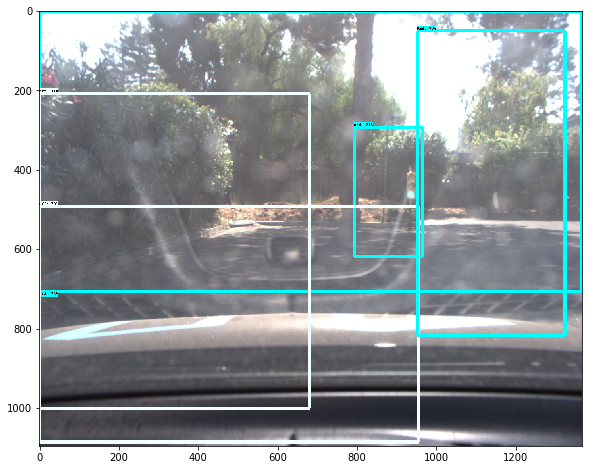

SCORES
[0.79952407 0.7714102  0.716751   0.7046324  0.674125   0.6735865
 0.6673068  0.66522294 0.65455645 0.6513448 ]
CLASSES
[2. 3. 4. 3. 3. 2. 2. 4. 2. 4.]


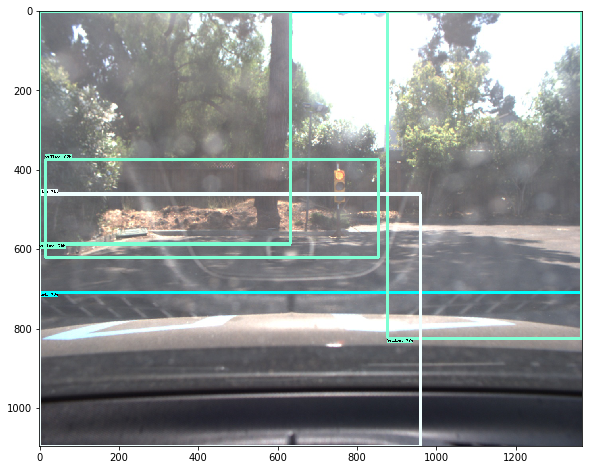

SCORES
[0.9000232  0.7960632  0.7894931  0.75947994 0.7139533  0.62983364
 0.6266474  0.6249747  0.62466604 0.6242413 ]
CLASSES
[4. 2. 3. 3. 3. 1. 2. 4. 4. 2.]


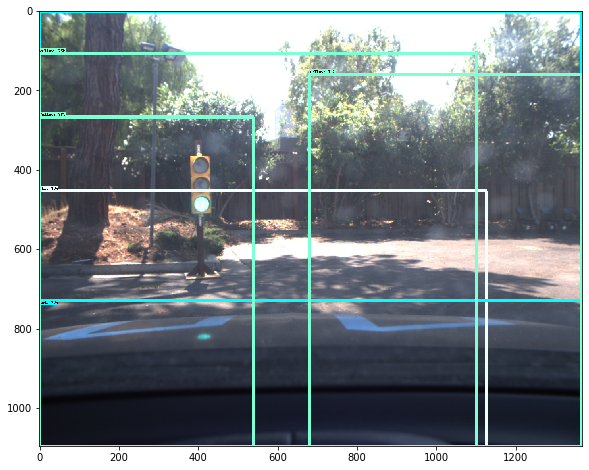

SCORES
[0.86594945 0.73892844 0.729308   0.70987195 0.7048843  0.6845598
 0.6674562  0.66657615 0.6575359  0.6426991 ]
CLASSES
[2. 2. 2. 4. 3. 2. 3. 1. 1. 2.]


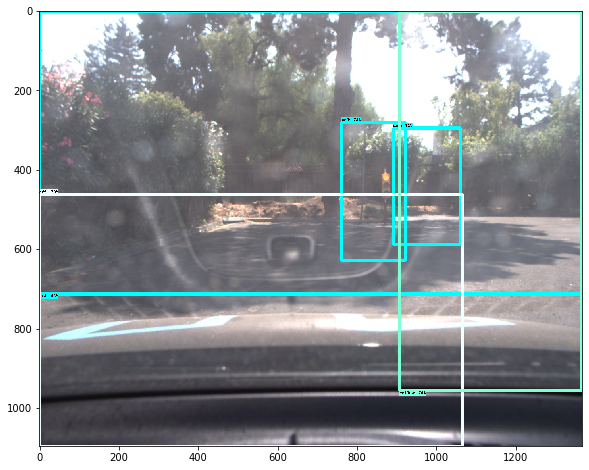

SCORES
[0.86129594 0.8498034  0.73800236 0.7123757  0.67746574 0.67150426
 0.6562293  0.6551295  0.6512244  0.64113915]
CLASSES
[2. 4. 3. 1. 3. 2. 4. 3. 2. 1.]


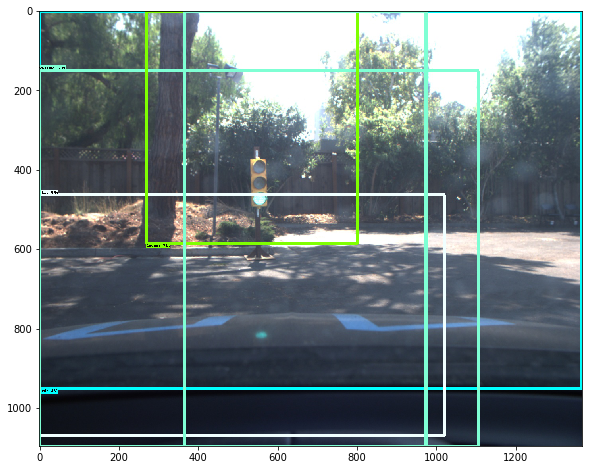

SCORES
[0.8326165  0.7685934  0.73927927 0.68979126 0.67053795 0.65658116
 0.64005274 0.6387914  0.62725496 0.61995906]
CLASSES
[4. 3. 3. 2. 3. 2. 2. 3. 3. 1.]


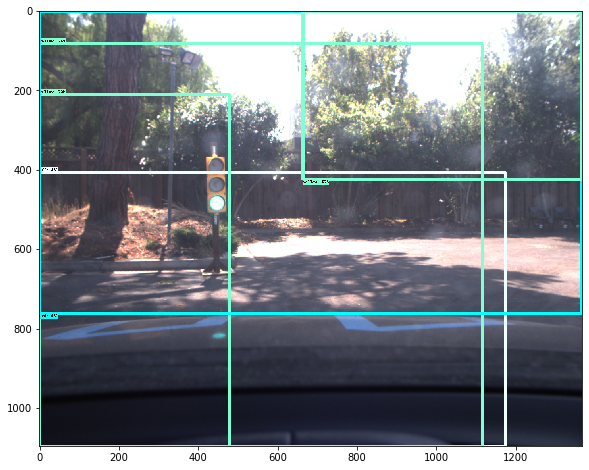

SCORES
[0.8261306  0.7967576  0.7397088  0.7362198  0.7346816  0.7141576
 0.71370083 0.6871331  0.67863834 0.6770157 ]
CLASSES
[2. 2. 3. 3. 3. 3. 4. 2. 2. 2.]


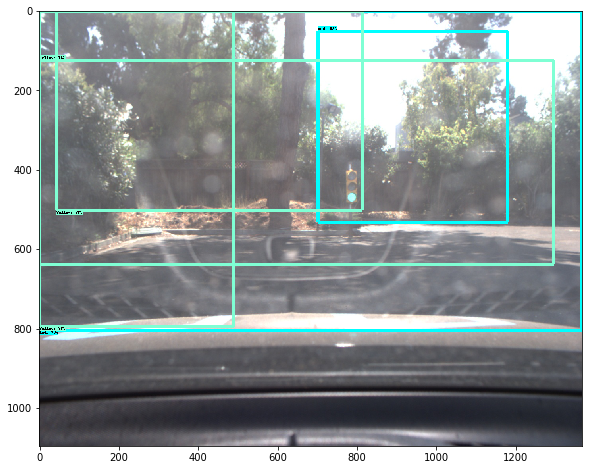

SCORES
[0.8814975  0.7967206  0.7408035  0.71316594 0.6922706  0.6794957
 0.6731764  0.67001534 0.65639764 0.6493317 ]
CLASSES
[4. 4. 2. 3. 4. 2. 1. 3. 3. 2.]


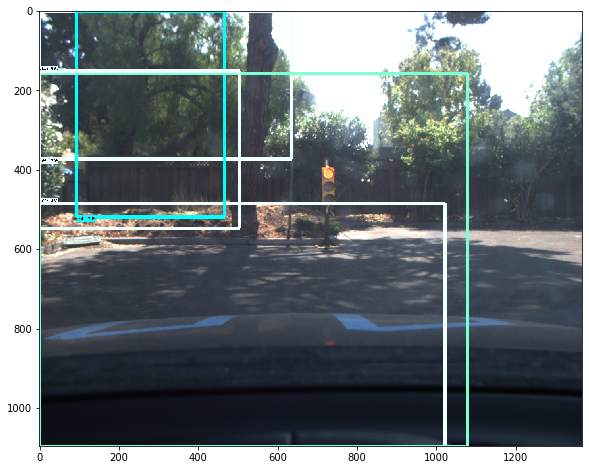

SCORES
[0.82840085 0.77447575 0.72826475 0.7178766  0.70908743 0.7034564
 0.702738   0.69150907 0.6868201  0.6862065 ]
CLASSES
[2. 4. 2. 2. 4. 3. 2. 4. 2. 2.]


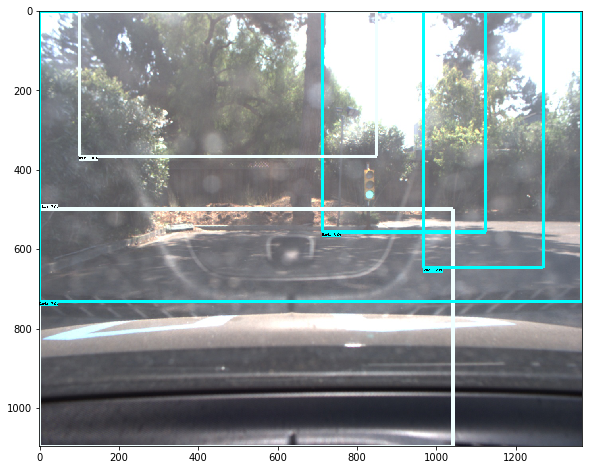

SCORES
[0.8882612  0.8273662  0.76275146 0.72484964 0.6483012  0.63754064
 0.6321818  0.6310647  0.6298095  0.6178841 ]
CLASSES
[4. 1. 3. 4. 2. 2. 4. 3. 4. 2.]


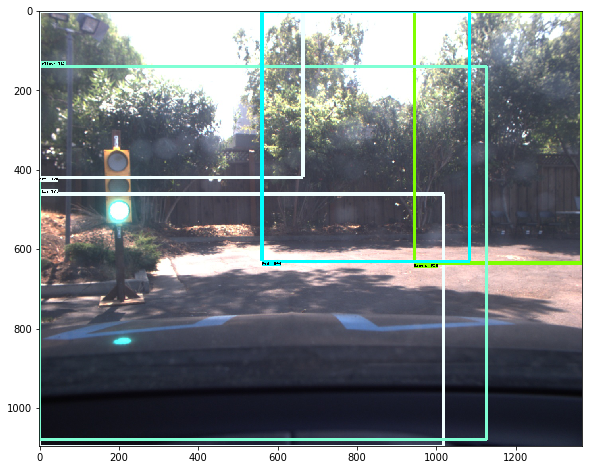

SCORES
[0.8261306  0.7967576  0.7397088  0.7362198  0.7346816  0.7141576
 0.71370083 0.6871331  0.67863834 0.6770157 ]
CLASSES
[2. 2. 3. 3. 3. 3. 4. 2. 2. 2.]


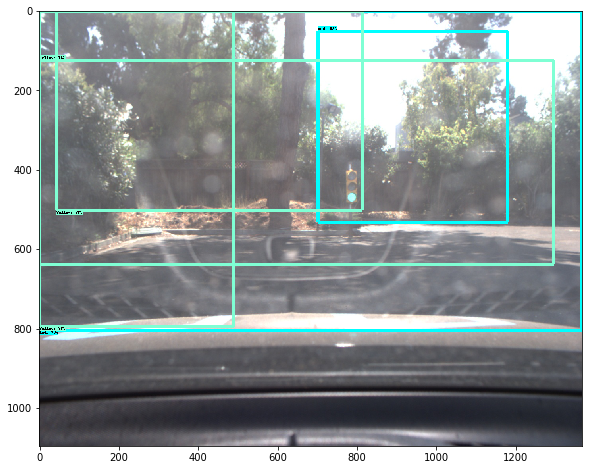

In [9]:
PATH_TO_IMGS = '/Users/neil_panchal/Desktop/Udacity/alex-lechner-udacity-traffic-light-dataset/udacity_testarea_rgb'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

In [10]:
PATH_TO_GRAPH = 'output_models/output_models/frozen_inference_graph.pb' ## load SSD trained on udacity's simulator images
detection_graph = load_graph(PATH_TO_GRAPH)

SCORES
[0.8243711  0.7656908  0.73360604 0.728456   0.71789235 0.7089155
 0.6943323  0.6888054  0.6838603  0.68198204]
CLASSES
[1. 1. 3. 3. 4. 1. 4. 2. 2. 1.]


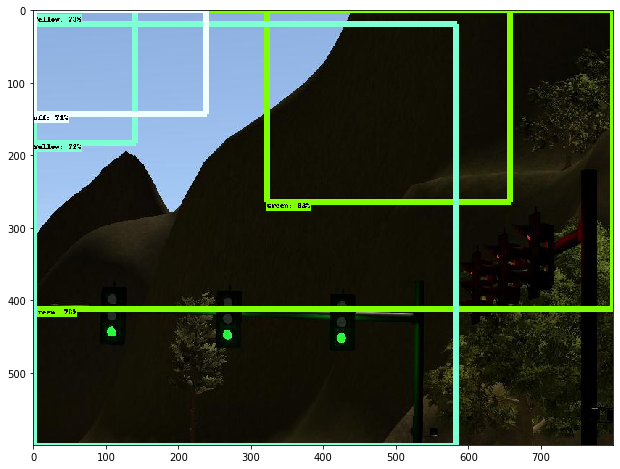

SCORES
[0.7915188  0.76910377 0.7534537  0.7228814  0.7197151  0.70908433
 0.6813803  0.6805968  0.66927546 0.66092944]
CLASSES
[2. 4. 2. 2. 2. 3. 3. 4. 4. 2.]


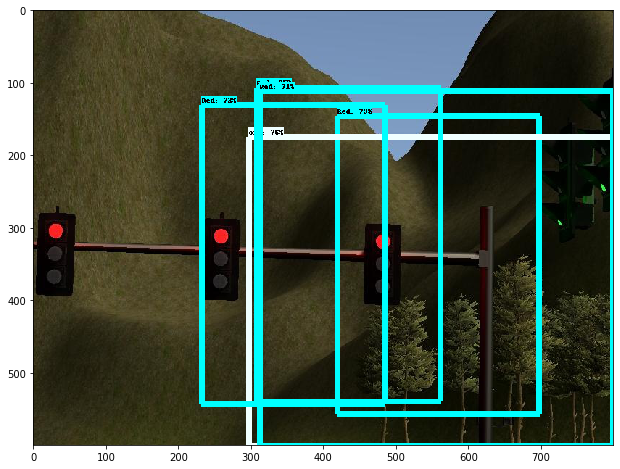

SCORES
[0.738538   0.7331115  0.73170954 0.7021142  0.697767   0.69449216
 0.69226915 0.65741646 0.65596586 0.65298647]
CLASSES
[1. 4. 3. 1. 2. 2. 4. 1. 2. 2.]


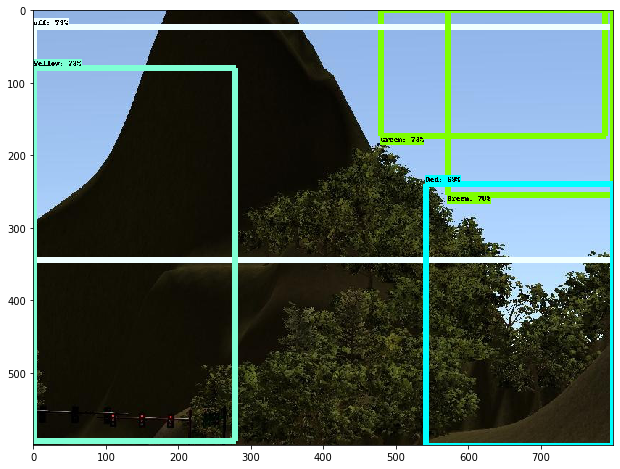

SCORES
[0.82197994 0.7408488  0.73799115 0.72405756 0.71914387 0.7160432
 0.7125463  0.711601   0.7084682  0.7076017 ]
CLASSES
[1. 3. 3. 1. 4. 3. 4. 2. 4. 4.]


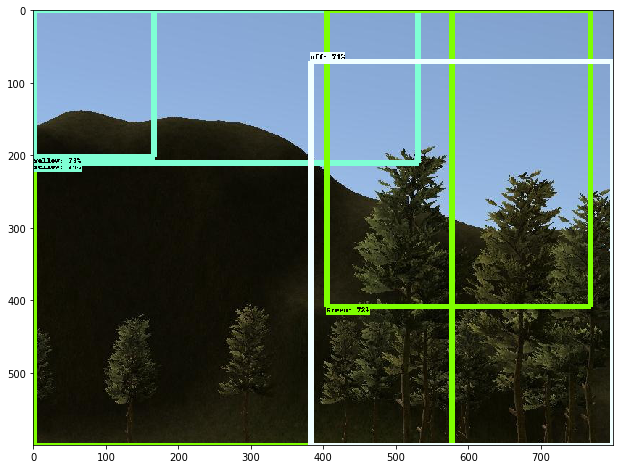

SCORES
[0.8152049  0.78598416 0.7816686  0.7343794  0.73326105 0.7284878
 0.7280743  0.72792095 0.7273189  0.7258895 ]
CLASSES
[1. 4. 4. 1. 3. 4. 4. 3. 2. 2.]


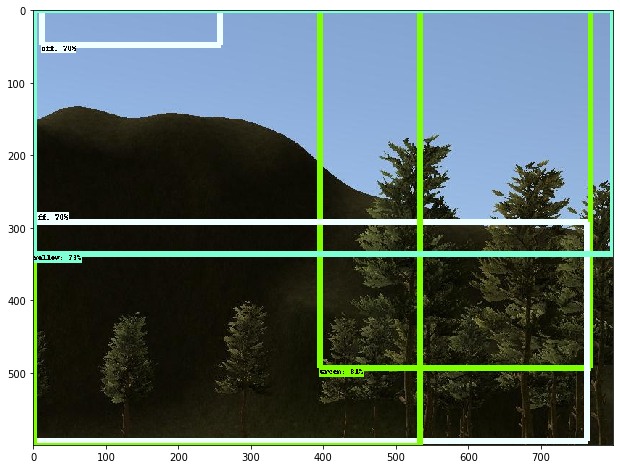

SCORES
[0.9072255  0.82548285 0.7744563  0.7497874  0.7489515  0.723995
 0.71613485 0.71541864 0.7144566  0.7109431 ]
CLASSES
[4. 1. 2. 1. 1. 3. 1. 1. 1. 4.]


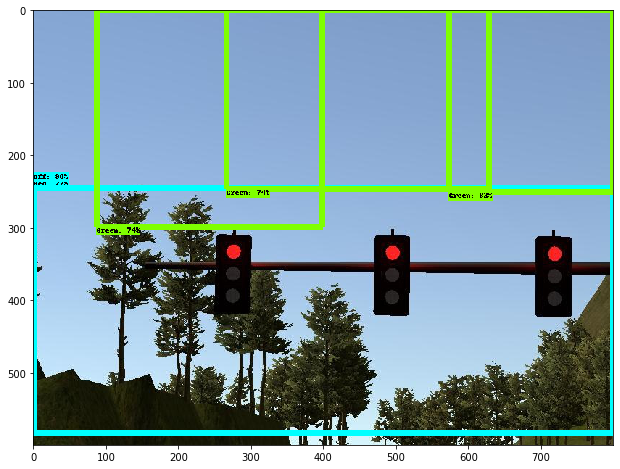

SCORES
[0.79823554 0.78395903 0.74749935 0.7302093  0.72847134 0.7263912
 0.71843493 0.68111426 0.66479206 0.6596687 ]
CLASSES
[3. 4. 1. 1. 3. 1. 1. 3. 2. 1.]


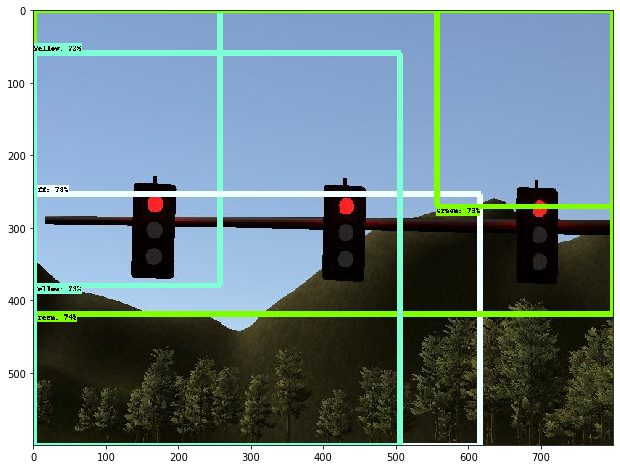

SCORES
[0.80903167 0.7918578  0.7905707  0.741777   0.73022735 0.7225867
 0.7198262  0.7191663  0.70967114 0.70833063]
CLASSES
[4. 1. 2. 3. 4. 3. 1. 1. 3. 4.]


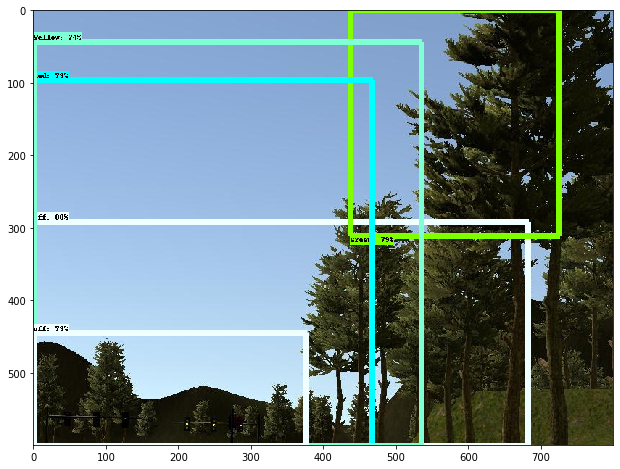

SCORES
[0.7841008  0.7553222  0.7099067  0.7008518  0.69724494 0.6912171
 0.6794272  0.6779487  0.6663615  0.6455609 ]
CLASSES
[3. 2. 3. 2. 4. 1. 2. 3. 3. 1.]


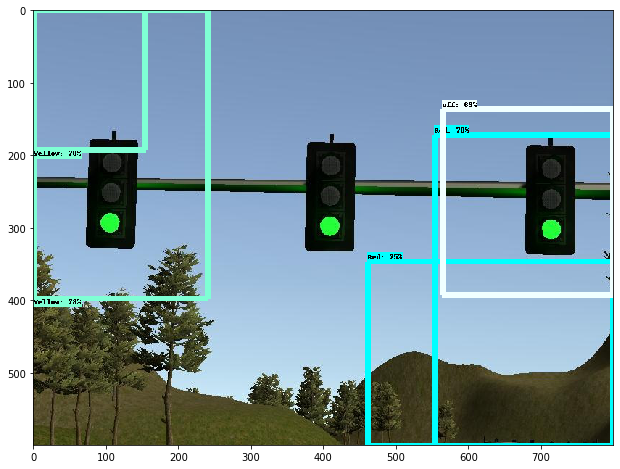

SCORES
[0.7724301  0.7428716  0.72388357 0.71801955 0.71720505 0.7078424
 0.7032774  0.6969427  0.696341   0.69284177]
CLASSES
[2. 1. 3. 3. 4. 4. 2. 4. 3. 1.]


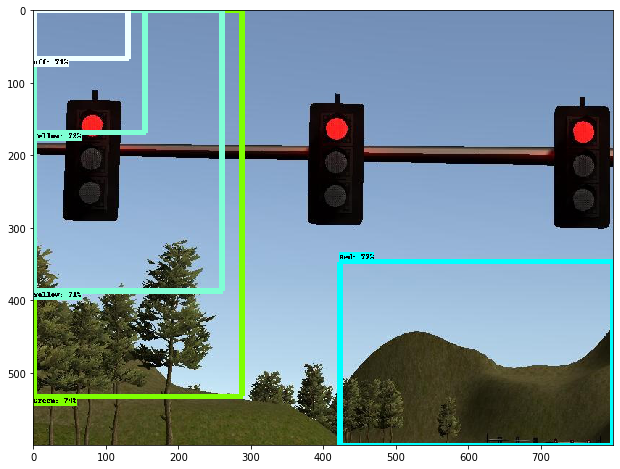

SCORES
[0.8813507  0.73266226 0.71985584 0.6957348  0.67027795 0.65114564
 0.64279205 0.6422056  0.6364038  0.63564736]
CLASSES
[4. 3. 1. 1. 2. 1. 2. 2. 1. 1.]


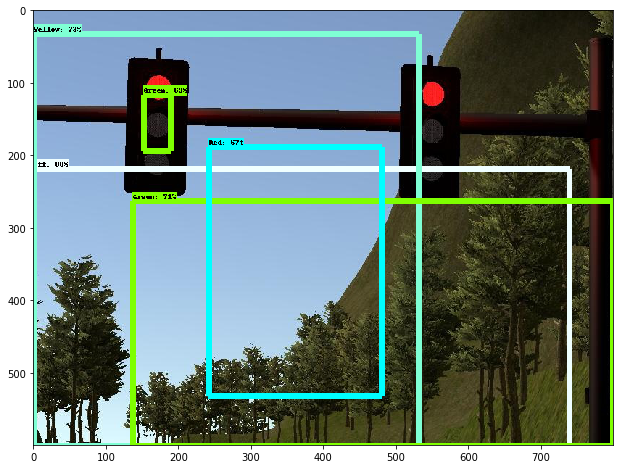

In [11]:
PATH_TO_IMGS = '/Users/neil_panchal/Desktop/Udacity/alex-lechner-udacity-traffic-light-dataset/simulator_dataset_rgb'
subfolder = ['Green', 'Red', 'Yellow', 'Unknown']
TEST_IMGS = []
for i in subfolder:
    TEST_IMGS += glob(os.path.join(os.path.join(PATH_TO_IMGS, i), r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break